In [60]:
require(mgcv)
require(itsadug)
require(readr)
require(dplyr)
require(ggplot2)

In [61]:
popt = function(w,h,r){
    options(repr.plot.width=w, repr.plot.height=h, repr.plot.res=r)
}

In [62]:
data = read_csv("../../data/casper/cadet_JanMay.csv")


-- Column specification ------------------------------------------------------------------------------------
cols(
  opid = col_character(),
  year = col_double(),
  woy = col_double(),
  source = col_character(),
  entity = col_character(),
  category = col_character(),
  attribute = col_character(),
  rating = col_double(),
  text = col_character()
)




In [64]:
names(data)

[1] "opid"      "year"      "woy"       "source"    "entity"    "category" 
[7] "attribute" "rating"    "text"

In [65]:
pol_data = data[(data$rating!=0) & (data$year==2021),2:8]
pol_data$rating = (pol_data$rating+1)/2
nrow(pol_data)

[1] 22454

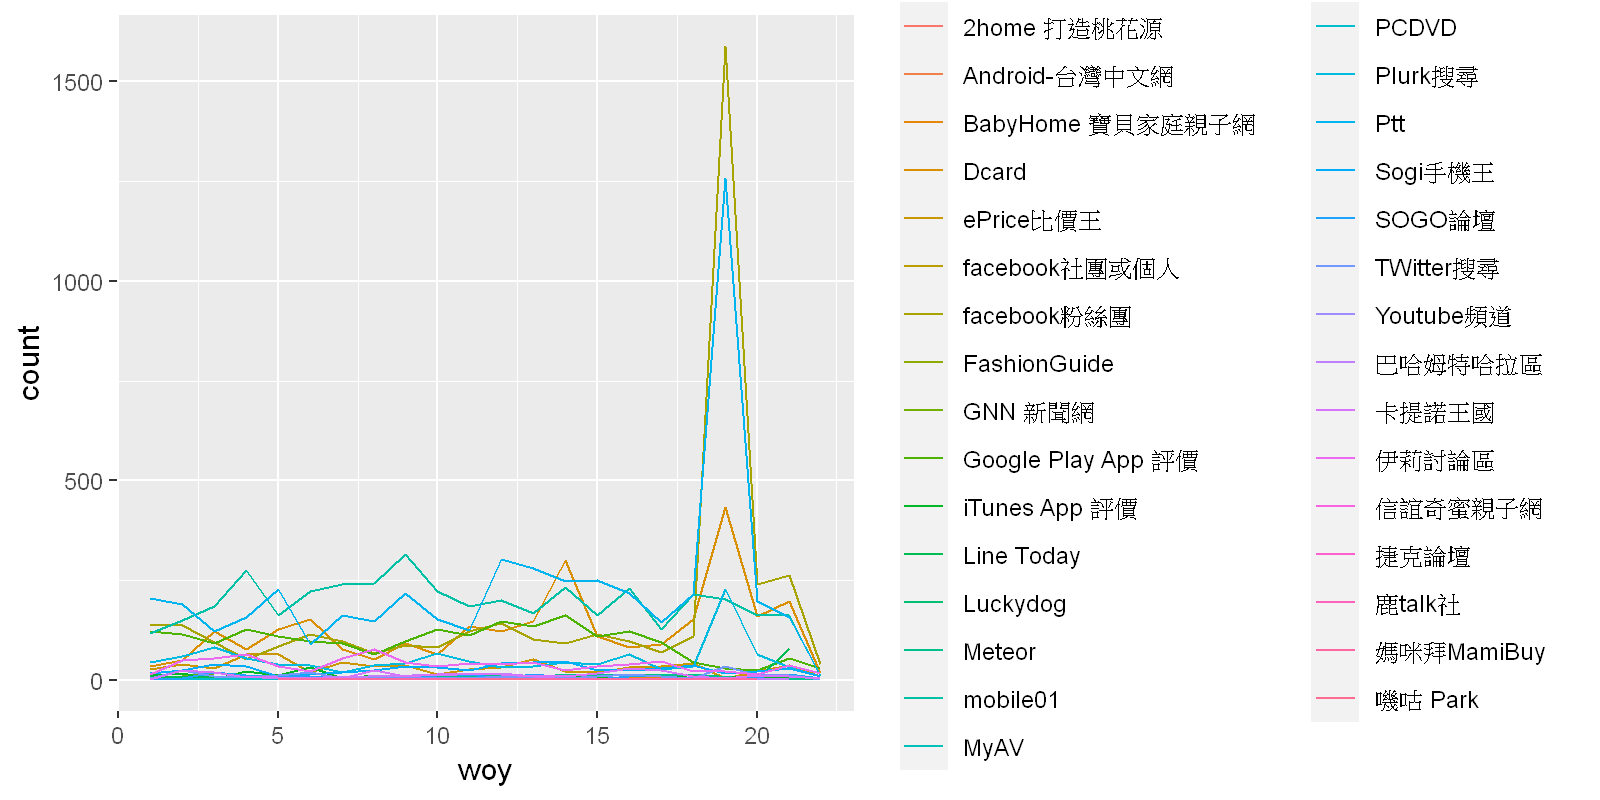

In [125]:
ggplot(pol_data, aes(x=woy, color=source)) + geom_line(stat="count")

In [133]:
pol_data %>% filter(woy==19) %>% group_by(source) %>% count() %>% arrange(desc(n))

source,n
<chr>,<int>
facebook粉絲團,1588
Ptt,1257
Dcard,433
Plurk搜尋,226
mobile01,201
TWitter搜尋,35
Google Play App 評價,29
伊莉討論區,21
Sogi手機王,17


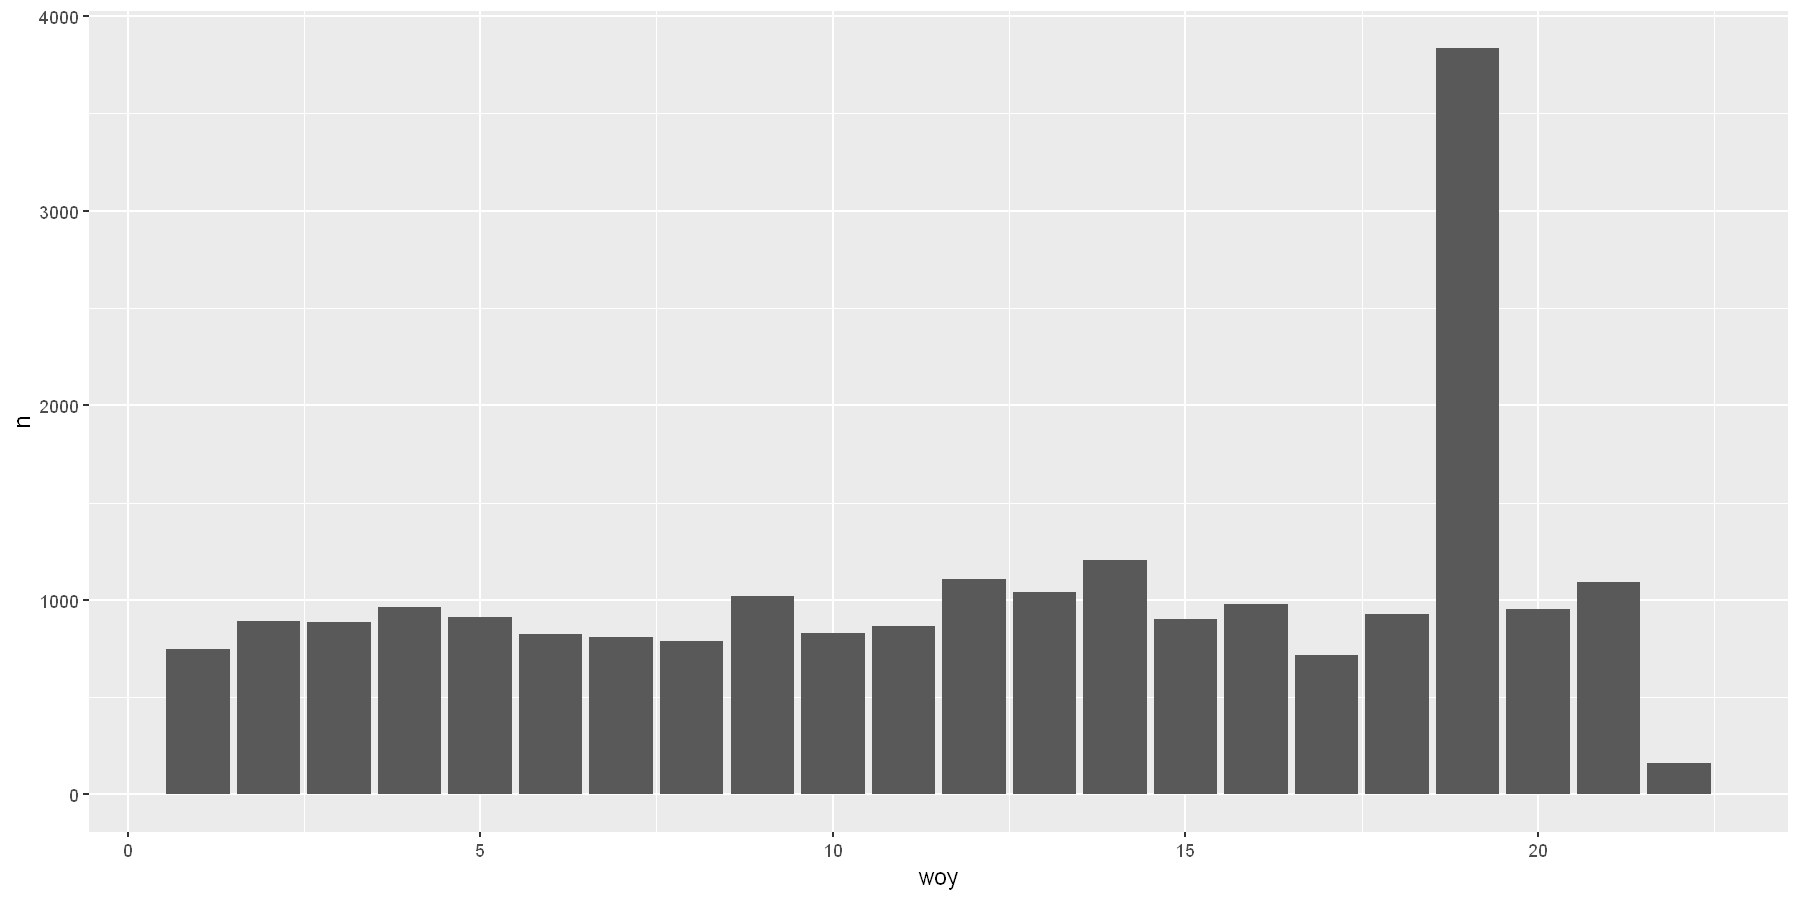

In [66]:
ggplot(data = pol_data %>% group_by(woy) %>% summarise(n=n()),
      aes(x=woy, y=n)) + geom_col()

[1] 4660

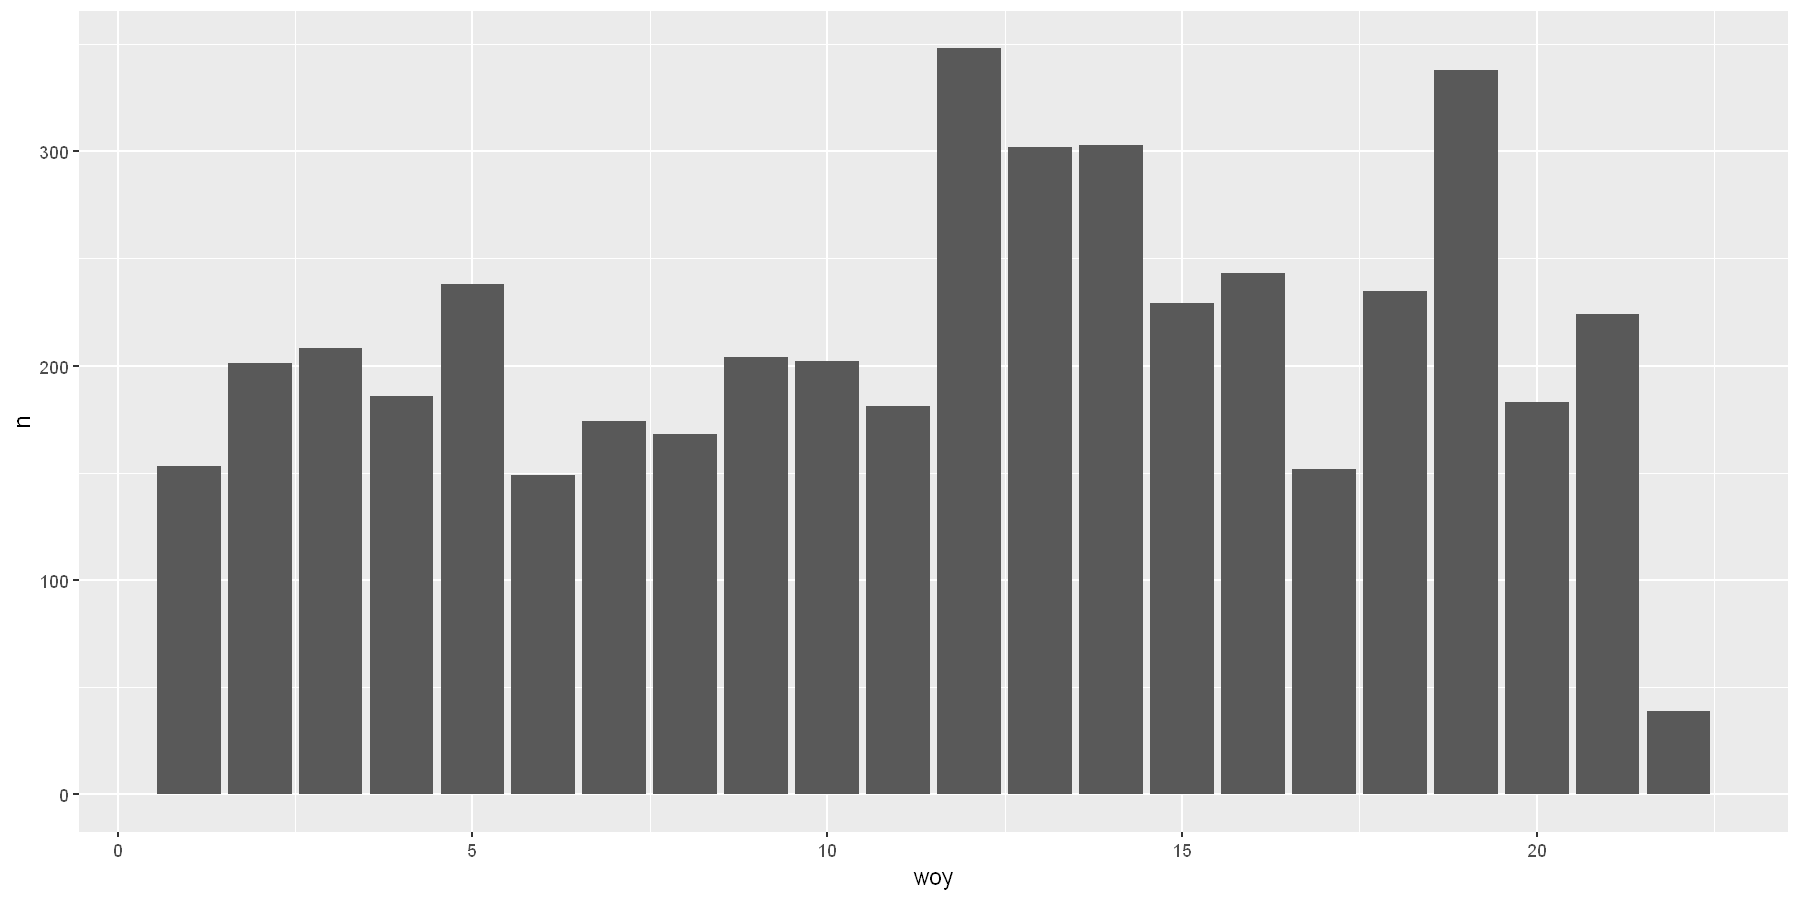

In [67]:
cht_data = pol_data[pol_data$entity=="中華電信", ]
nrow(cht_data)
ggplot(data = cht_data %>% group_by(woy) %>% summarise(n=n()),
      aes(x=woy, y=n)) + geom_col()

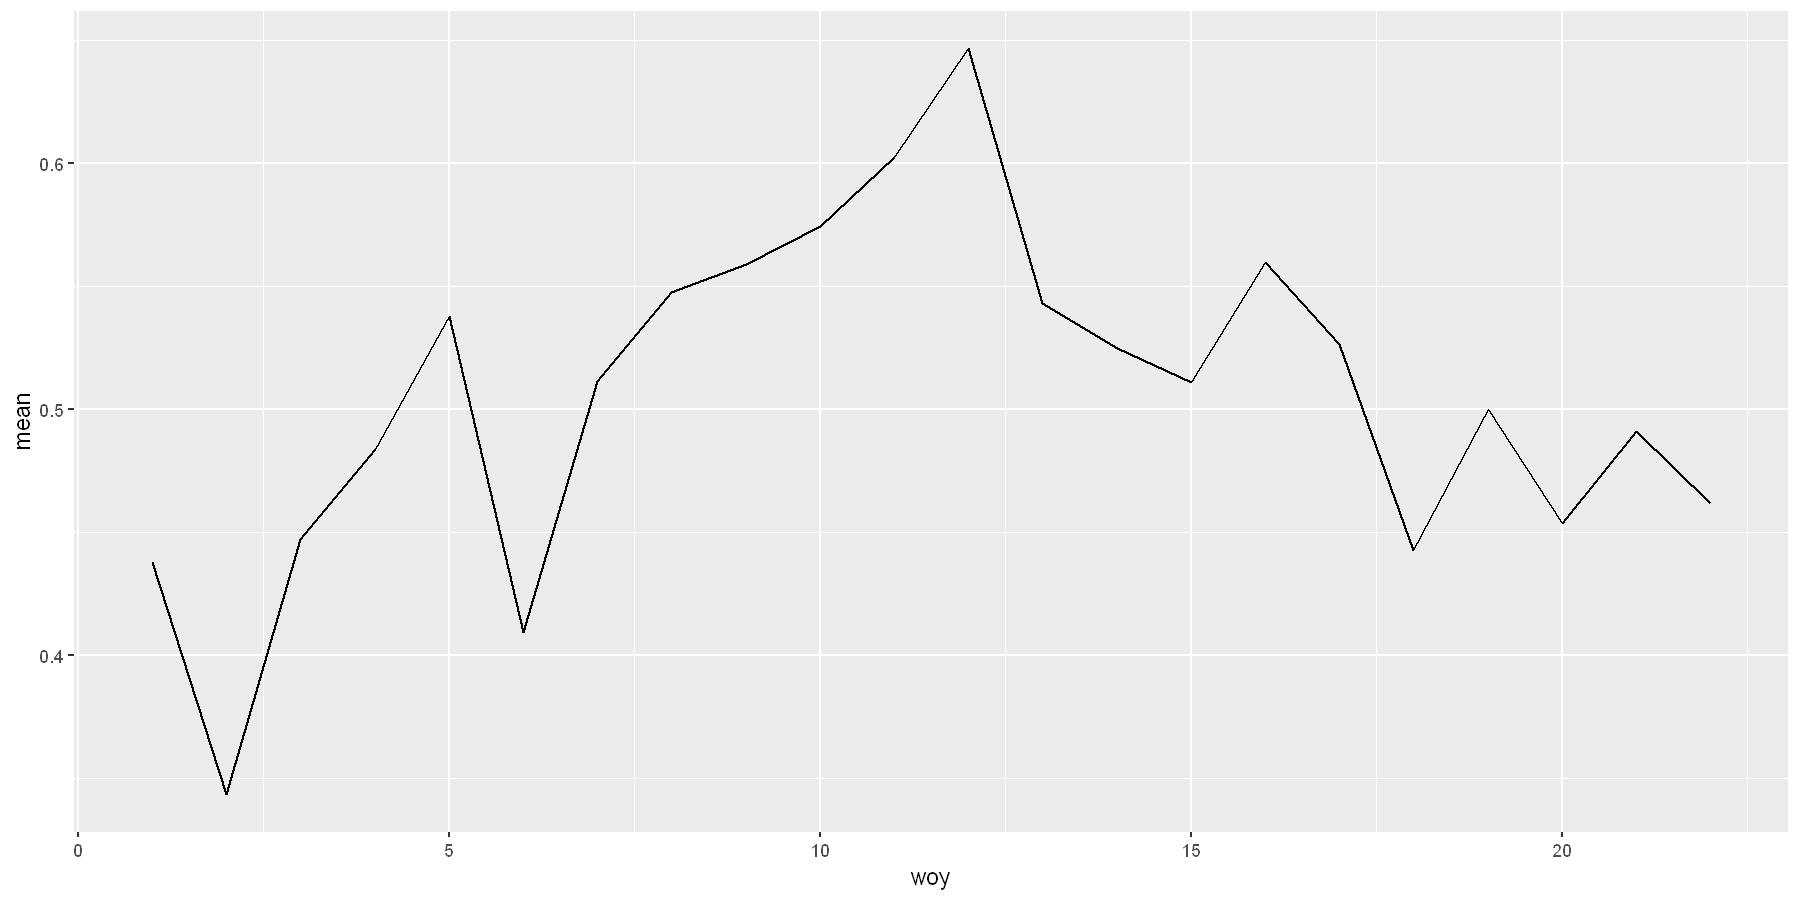

In [68]:
ggplot(data = cht_data %>% 
               group_by(woy) %>% 
               summarise(mean=mean(rating)),
      aes(x=woy, y=mean)) + geom_line()

In [69]:
cht_data$category = relevel(factor(cht_data$category), "無")
xtabs(~woy+category, cht_data)

    category
woy   無 加值服務 其他 通訊品質 資費方案
  1   47       31    8       47       20
  2   50       21   17       64       49
  3   43       18   21       80       46
  4   32       14   16       62       62
  5   71        9   13      104       41
  6   50        0    9       65       25
  7   35        4   14       86       35
  8   28        5    3       78       54
  9   52       22   14       73       43
  10  33        9   15       80       65
  11  33       11   15       76       46
  12  39      190    9       61       49
  13  58       84   16       90       54
  14  60       49   17      114       63
  15  44       40   19       73       53
  16  45       35   13       97       53
  17  38       16   12       61       25
  18  41       52    8       80       54
  19 127       43   18       84       66
  20  46        7    9       76       45
  21  56       17   23       83       45
  22   8        2    2       25        2

In [95]:
m1 = bam(rating~category+s(woy, by=category), data = cht_data, family="binomial", method="ML")

In [96]:
summary(m1)


Family: binomial 
Link function: logit 

Formula:
rating ~ category + s(woy, by = category)

Parametric coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)      -0.001483   0.063251  -0.023   0.9813  
category加值服務  0.278407   0.122555   2.272   0.0231 *
category其他     -0.288815   0.135526  -2.131   0.0331 *
category通訊品質 -0.072430   0.080193  -0.903   0.3664  
category資費方案  0.200061   0.089813   2.228   0.0259 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                          edf Ref.df Chi.sq p-value    
s(woy):category無       2.423  3.019 14.403 0.00242 ** 
s(woy):category加值服務 5.405  6.474 59.114 < 2e-16 ***
s(woy):category其他     1.001  1.001  4.818 0.02818 *  
s(woy):category通訊品質 2.082  2.602  6.572 0.09284 .  
s(woy):category資費方案 1.001  1.002  0.236 0.62712    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.0277   Deviance explained =  2.3%
-ML 

In [97]:
require(RColorBrewer)

Summary:
	* category : factor; set to the value(s): 加值服務, 其他, 通訊品質, 無, 資費方案. 
	* woy : numeric predictor; with 30 values ranging from 1.000000 to 22.000000. 
	* NOTE : No random effects in the model to cancel.
 


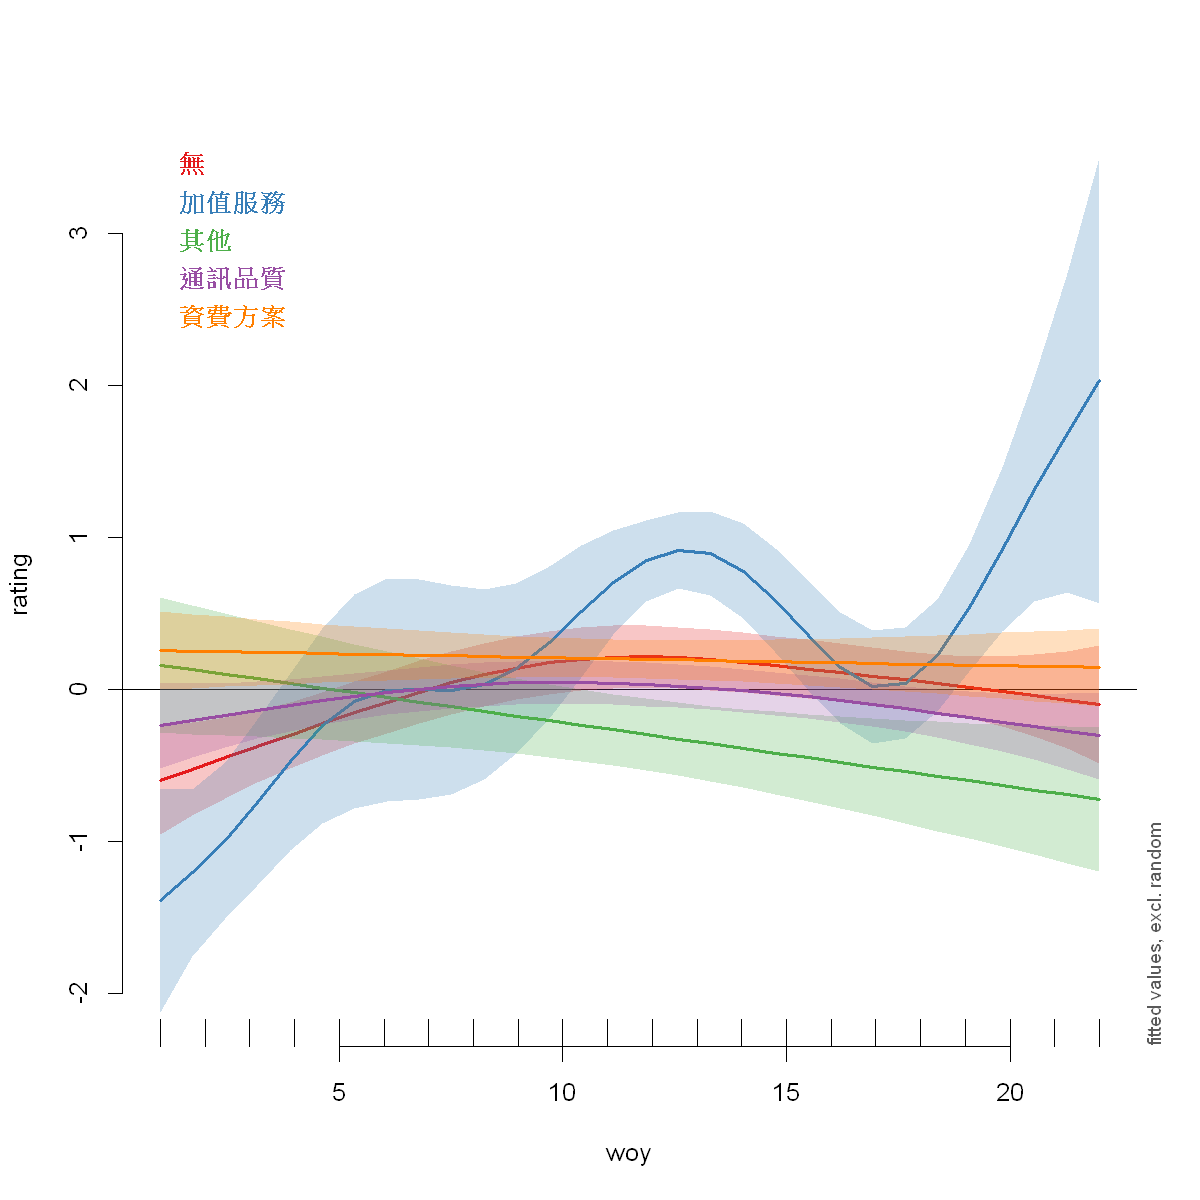

In [99]:
popt(8, 8, 150)
palette(brewer.pal(n = 8, name = "Set2"))
plot_smooth(m1, view="woy", plot_all="category",
            col=brewer.pal(8, "Set1"), lwd=2, legend_plot_all="topleft")

[1] 17794

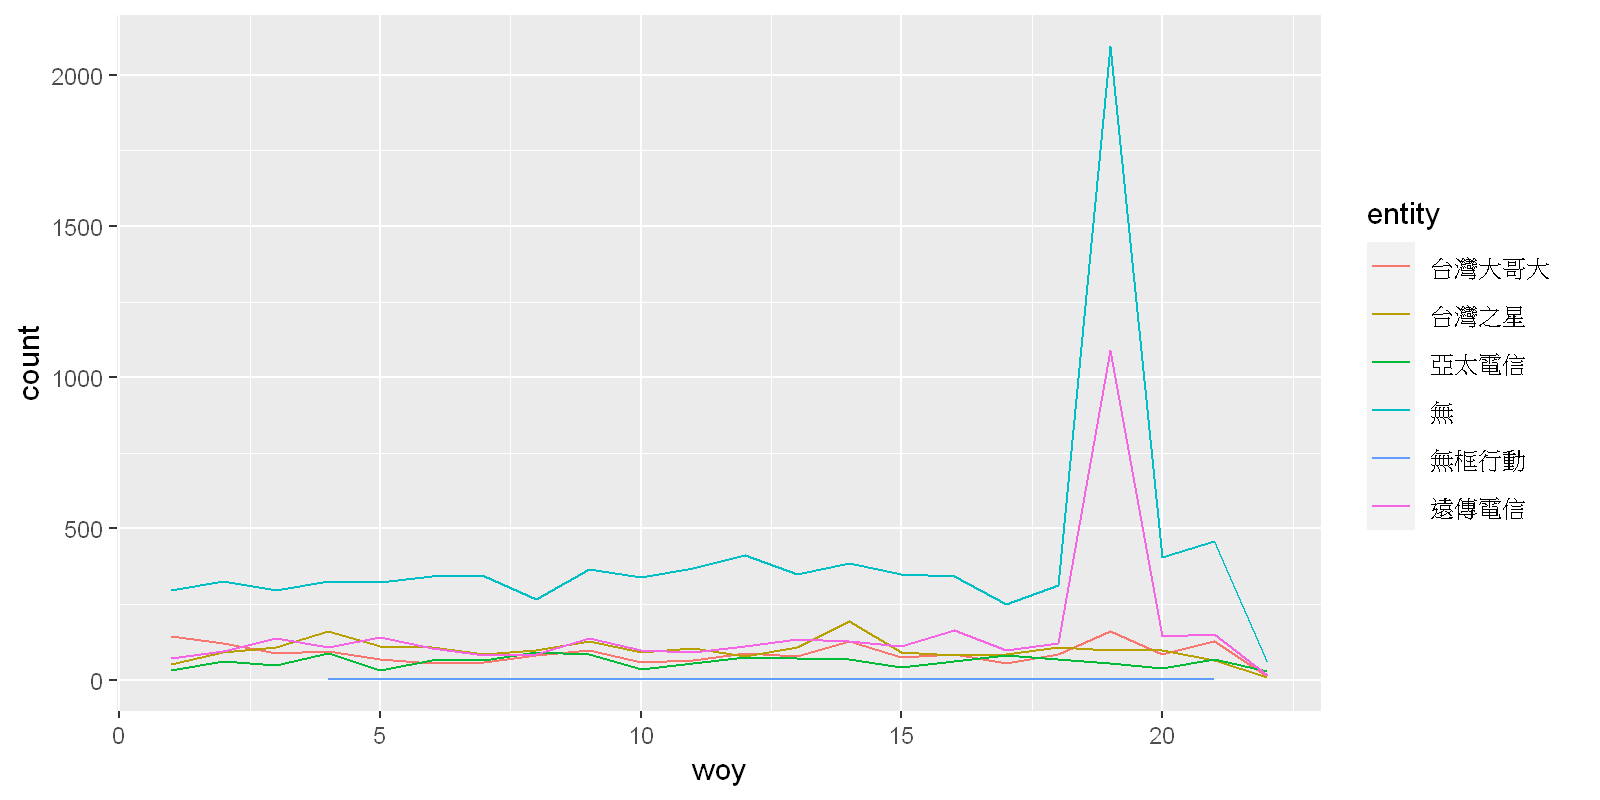

In [121]:
popt(8,4, 200)
ent_data = pol_data[pol_data$entity!="中華電信", ]
nrow(ent_data)
ggplot(ent_data, aes(x=woy, color=entity)) + geom_line(stat="count")

In [124]:
range(data$woy)

[1]  1 53

In [116]:
ent_data$entity = relevel(factor(ent_data$entity), ref="遠傳電信")
m2 = bam(rating~entity+s(woy, by=entity), data = ent_data[ent_data$entity!="無框行動", ], family="binomial", method="ML")
summary(m2)


Family: binomial 
Link function: logit 

Formula:
rating ~ entity + s(woy, by = entity)

Parametric coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.41933    0.04009 -10.460  < 2e-16 ***
entity台灣大哥大  0.16036    0.06328   2.534   0.0113 *  
entity台灣之星    0.29356    0.06155   4.769 1.85e-06 ***
entity亞太電信    0.82456    0.07056  11.686  < 2e-16 ***
entity無         -0.65193    0.04797 -13.590  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                          edf Ref.df  Chi.sq  p-value    
s(woy):entity遠傳電信   8.674  8.966 576.075  < 2e-16 ***
s(woy):entity台灣大哥大 6.481  7.596  59.154  < 2e-16 ***
s(woy):entity台灣之星   3.155  3.930  22.673 0.000122 ***
s(woy):entity亞太電信   1.730  2.162   6.403 0.051205 .  
s(woy):entity無         8.804  8.988 672.043  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.124   Deviance explained = 

Summary:
	* entity : factor; set to the value(s): 台灣大哥大, 台灣之星, 亞太電信, 無, 遠傳電信. 
	* woy : numeric predictor; with 30 values ranging from 1.000000 to 22.000000. 
	* NOTE : No random effects in the model to cancel.
 


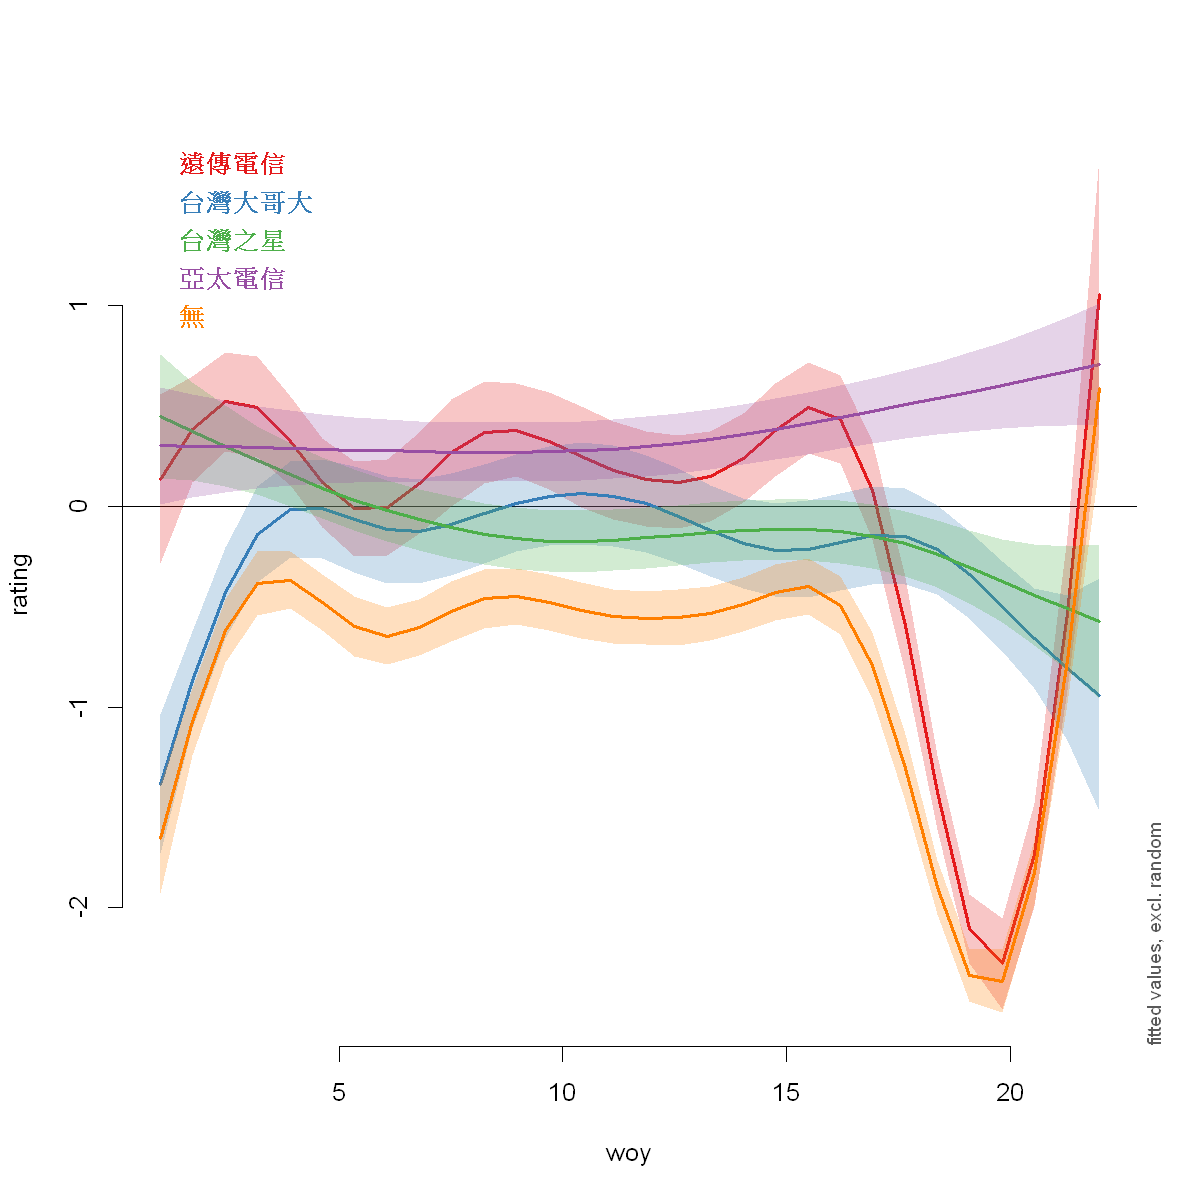

In [117]:
popt(8, 8, 150)
plot_smooth(m2, view="woy", plot_all="entity", 
            col=brewer.pal(8, "Set1"), lwd=2, legend_plot_all="topleft")

In [151]:
ent_data$entity = relevel(factor(ent_data$entity), ref="遠傳電信")
ent_data$source = factor(ent_data$source)
m3_data = ent_data[ent_data$entity!="無框行動", ]
m3 = bam(rating~entity+s(woy, by=entity)+s(source, bs="re"), 
         data = m3_data, family="binomial")
summary(m3)


Family: binomial 
Link function: logit 

Formula:
rating ~ entity + s(woy, by = entity) + s(source, bs = "re")

Parametric coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.45535    0.47808   0.952  0.34087    
entity台灣大哥大  0.21189    0.07075   2.995  0.00275 ** 
entity台灣之星   -0.05297    0.07182  -0.738  0.46075    
entity亞太電信    0.37512    0.08281   4.530  5.9e-06 ***
entity無         -0.32876    0.05566  -5.906  3.5e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                           edf Ref.df   Chi.sq  p-value    
s(woy):entity遠傳電信    8.128  8.780  326.949  < 2e-16 ***
s(woy):entity台灣大哥大  5.185  6.285   29.075 5.75e-05 ***
s(woy):entity台灣之星    3.724  4.624    7.606    0.122    
s(woy):entity亞太電信    1.001  1.001    1.800    0.180    
s(woy):entity無          8.701  8.972  405.518  < 2e-16 ***
s(source)               24.860 29.000 1696.498  < 2e-16 ***
---
Signif. code

In [152]:
gam.vcomp(m3)


Standard deviations and 0.95 confidence intervals:

                             std.dev        lower        upper
s(woy):entity遠傳電信   0.4932055083 2.753415e-01 8.834546e-01
s(woy):entity台灣大哥大 0.1305786863 3.464806e-02 4.921139e-01
s(woy):entity台灣之星   0.0636092545 1.609929e-02 2.513239e-01
s(woy):entity亞太電信   0.0003772436 1.091569e-33 1.303745e+26
s(woy):entity無         0.5379021843 3.187335e-01 9.077764e-01
s(source)               2.4180658534 1.783173e+00 3.279011e+00

Rank: 6/6


In [155]:
unique(m3_data$source)

[1] Dcard                   ePrice比價王            facebook粉絲團         
 [4] Google Play App 評價    iTunes App 評價         mobile01               
 [7] Ptt                     Plurk搜尋               SOGO論壇               
[10] 伊莉討論區              GNN 新聞網              Line Today             
[13] PCDVD                   Sogi手機王              TWitter搜尋            
[16] 卡提諾王國              Youtube頻道             Android-台灣中文網     
[19] BabyHome 寶貝家庭親子網 巴哈姆特哈拉區          Meteor                 
[22] FashionGuide            媽咪拜MamiBuy           facebook社團或個人     
[25] 捷克論壇                鹿talk社                信誼奇蜜親子網         
[28] 2home 打造桃花源        嘰咕 Park               Luckydog               
30 Levels: 2home 打造桃花源 Android-台灣中文網 ... 嘰咕 Park

Summary:
	* entity : factor; set to the value(s): 遠傳電信. 
	* woy : numeric predictor; with 30 values ranging from 1.000000 to 22.000000. 
	* source : factor; set to the value(s): facebook粉絲團. 
Summary:
	* entity : factor; set to the value(s): 遠傳電信. 
	* woy : numeric predictor; with 30 values ranging from 1.000000 to 22.000000. 
	* source : factor; set to the value(s): Line Today. 


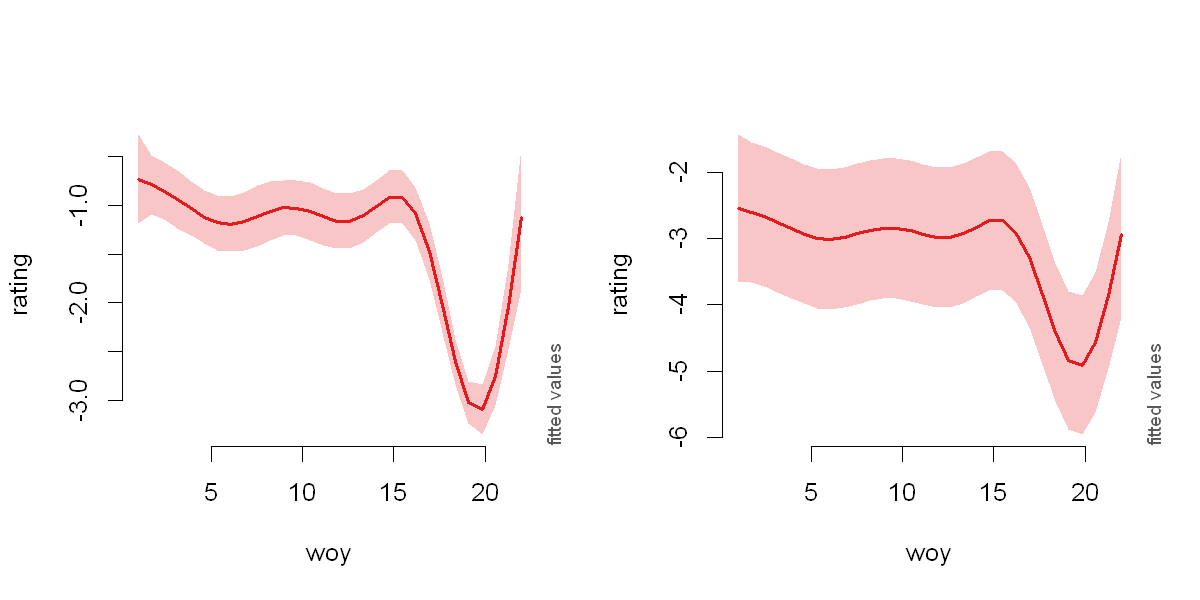

In [163]:
popt(8, 4, 150)
par(mfrow=c(1, 2))
plot_smooth(m3, view="woy",             
            cond=list(entity="遠傳電信", source="facebook粉絲團"),
            col=brewer.pal(8, "Set1"), lwd=2,             
            legend_plot_all="topleft", rm.ranef=F)
plot_smooth(m3, view="woy",             
            cond=list(entity="遠傳電信", source="Line Today"),
            col=brewer.pal(8, "Set1"), lwd=2,             
            legend_plot_all="topleft", rm.ranef=F)

Warning message in plot_smooth(m3, view = "woy", cond = list(entity = "遠傳電信", :
"source in cond and in plot_all. Not all levels are being plotted."


Summary:
	* entity : factor; set to the value(s): 遠傳電信. 
	* woy : numeric predictor; with 30 values ranging from 1.000000 to 22.000000. 
	* source : factor; set to the value(s): facebook粉絲團, Line Today. 


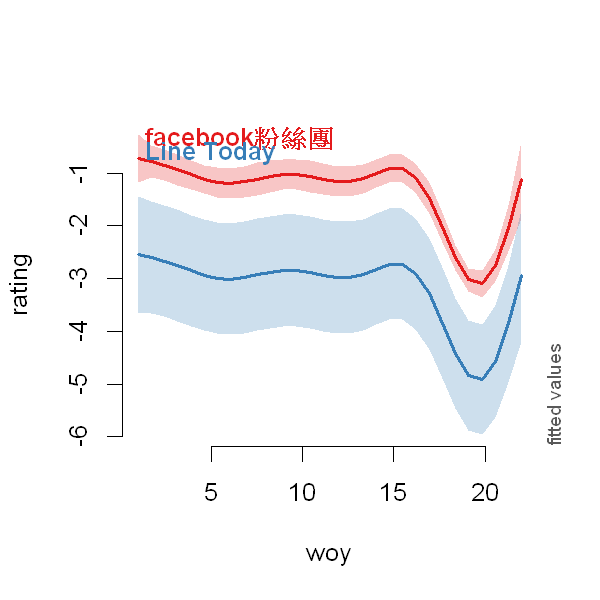

In [164]:
popt(4, 4, 150)
plot_smooth(m3, view="woy",             
            cond=list(entity="遠傳電信", source=c("facebook粉絲團", "Line Today")),
            plot_all="source",
            col=brewer.pal(8, "Set1"), lwd=2,             
            legend_plot_all="topleft", rm.ranef=F)